In [81]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
flow_matrix = pd.DataFrame([[13,7,0,0,0,0,0,0],
                            [0,0,0,0,0,0,13,6],
                            [0,0,0,4,0,3,4,0],
                            [0,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,10],
                            [6,0,0,0,0,0,0,0],
                            [0,0,0,3,0,0,0,4],
                            [0,4,0,3,6,4,0,0]],
                            index=["Receiving","VTC 1","VTC 2","CB","HMC","UMC","VMC","SHP"],
                            columns=["VTC 1","VTC 2","CB","HMC","UMC","VMC","SHP","Shipping"])     
  
distance_matrix= pd.DataFrame([[6,12,24,24,36,24,30,30],
                            [0,36,12,12,24,12,18,18],
                            [36,0,18,6,30,18,12,24],
                            [12,18,0,18,30,18,24,24],
                            [24,30,6,0,18,6,36,12],
                            [18,24,24,24,0,24,30,30],
                            [30,36,36,36,12,0,42,6],
                            [30,36,36,36,12,36,0,6]],
                            index=["Receiving","LOC1","LOC2","LOC3","LOC4","LOC5","LOC6","LOC7"],
                            columns=["LOC1","LOC2","LOC3","LOC4","LOC5","LOC6","LOC7","Shipping"])

In [83]:
distance_matrix

,LOC1,LOC2,LOC3,LOC4,LOC5,LOC6,LOC7,Shipping
Receiving,6,12,24,24,36,24,30,30
LOC1,0,36,12,12,24,12,18,18
LOC2,36,0,18,6,30,18,12,24
LOC3,12,18,0,18,30,18,24,24
LOC4,24,30,6,0,18,6,36,12
LOC5,18,24,24,24,0,24,30,30
LOC6,30,36,36,36,12,0,42,6
LOC7,30,36,36,36,12,36,0,6


In [84]:
flow_matrix

,VTC 1,VTC 2,CB,HMC,UMC,VMC,SHP,Shipping
Receiving,13,7,0,0,0,0,0,0
VTC 1,0,0,0,0,0,0,13,6
VTC 2,0,0,0,4,0,3,4,0
CB,0,0,0,0,0,0,0,0
HMC,0,0,0,0,0,0,0,10
UMC,6,0,0,0,0,0,0,0
VMC,0,0,0,3,0,0,0,4
SHP,0,4,0,3,6,4,0,0


According to the locations found in the alternative layout 1, distance matrix is rearrenged in such a way that it fits the flow_matrix.  

In [85]:
rearrange_index=["Receiving","LOC1","LOC7","LOC3","LOC2","LOC6","LOC5","LOC4"]
rearrange_columns=["LOC1","LOC7","LOC3","LOC2","LOC6","LOC5","LOC4","Shipping"]

init_distance_matrix=distance_matrix.reindex(index=rearrange_index,
                                            columns=rearrange_columns)
init_distance_matrix

,LOC1,LOC7,LOC3,LOC2,LOC6,LOC5,LOC4,Shipping
Receiving,6,30,24,12,24,36,24,30
LOC1,0,18,12,36,12,24,12,18
LOC7,30,0,36,36,36,12,36,6
LOC3,12,24,0,18,18,30,18,24
LOC2,36,12,18,0,18,30,6,24
LOC6,30,42,36,36,0,12,36,6
LOC5,18,30,24,24,24,0,24,30
LOC4,24,36,6,30,6,18,0,12


In cost matrix, to show which location the machines are located, each machines' location name is added to the columns of the distance matrix.

In [86]:
def name_location(col1,col2,num_of_loc=7):
    col_names=[]
    for i in range(num_of_loc):
        col_names.append(col1[i]+"("+col2[i]+")")
    col_names.append(col1[-1])
    return col_names

By multiplying the init_distance and the flow matrices, one can find the init_cost matrix which represents the anlternative layout 1's total cost.

In [87]:
init_cost_matrix= pd.DataFrame(flow_matrix.values * init_distance_matrix.values, index=flow_matrix.index, columns=name_location(flow_matrix.columns,init_distance_matrix.columns))
init_cost_matrix


,VTC 1(LOC1),VTC 2(LOC7),CB(LOC3),HMC(LOC2),UMC(LOC6),VMC(LOC5),SHP(LOC4),Shipping
Receiving,78,210,0,0,0,0,0,0
VTC 1,0,0,0,0,0,0,156,108
VTC 2,0,0,0,144,0,36,144,0
CB,0,0,0,0,0,0,0,0
HMC,0,0,0,0,0,0,0,240
UMC,180,0,0,0,0,0,0,0
VMC,0,0,0,72,0,0,0,120
SHP,0,144,0,90,36,72,0,0


In [88]:
total_cost=init_cost_matrix.values.sum()
total_cost

1830

## Craft Algorithm Implementation 

In [89]:
def CRAFT(flow_matrix,distance_matrix,row,col,current_cost,num_of_iter,num_of_loc=7):
    names=[]
    total_costs=[]
    for i in range(1,num_of_loc):
        for j in range(i+1,num_of_loc+1):
            new_col=[]
            new_row=[]
            for c in col:
                if c == "LOC"+str(i):
                    new_col.append("LOC"+str(j))
                elif c == "LOC"+str(j):
                    new_col.append("LOC"+str(i))
                else:
                    new_col.append(c)
            for r in row:
                if r == "LOC"+str(i):
                    new_row.append("LOC"+str(j))
                elif r == "LOC"+str(j):
                    new_row.append("LOC"+str(i))
                else:
                    new_row.append(r)
            new_distance_matrix=distance_matrix.reindex(index=new_row,
                                                columns=new_col)
            alt_cost_matrix=pd.DataFrame(flow_matrix.values * new_distance_matrix.values,
                                        index=flow_matrix.index, columns=name_location(flow_matrix.columns,new_distance_matrix.columns))
            alt_cost_matrix.to_excel("iteration "+str(num_of_iter)+"-("+str(i)+", "+str(j)+").xlsx")
            names.append("("+str(i)+", "+str(j)+")")
            total_costs.append(alt_cost_matrix.values.sum())

    # Below code is written to plot the results 
    fig, ax = plt.subplots() 
    ax.barh(names,total_costs)
    if current_cost<=min(total_costs):
        ax.set(xlabel='Total Cost', ylabel='interchanges', title='Craft stops')
        ax.axvline(current_cost, ls='--', color='g')
        return current_cost
    else:
        ax.set(xlabel='Total Cost', ylabel='interchanges', title='change location '+ names[total_costs.index(min(total_costs))])
        ax.axvline(current_cost, ls='--', color='r')
    return min(total_costs)

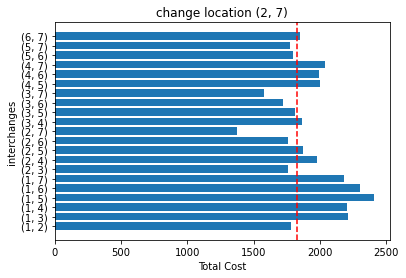

In [90]:
total_cost=CRAFT(flow_matrix,distance_matrix,rearrange_index,rearrange_columns,total_cost,1)


In [91]:
print(f"Total cost after craft iteration 1 : {total_cost}" )

Total cost after craft iteration 1 : 1374


Since the interchange of the machine VTC2(LOC7) and HMC(LOC2) gives a better result, the folllowing code makes the necessary interchanges.

In [92]:
rearrange_index=["Receiving","LOC1","LOC2","LOC3","LOC7","LOC6","LOC5","LOC4"]
rearrange_columns=["LOC1","LOC2","LOC3","LOC7","LOC6","LOC5","LOC4","Shipping"]

iter1_distance_matrix=distance_matrix.reindex(index=rearrange_index,
                                            columns=rearrange_columns)
iter1_cost_matrix= pd.DataFrame(flow_matrix.values * iter1_distance_matrix.values, index=flow_matrix.index, columns=name_location(flow_matrix.columns,iter1_distance_matrix.columns))
iter1_cost_matrix

,VTC 1(LOC1),VTC 2(LOC2),CB(LOC3),HMC(LOC7),UMC(LOC6),VMC(LOC5),SHP(LOC4),Shipping
Receiving,78,84,0,0,0,0,0,0
VTC 1,0,0,0,0,0,0,156,108
VTC 2,0,0,0,48,0,90,24,0
CB,0,0,0,0,0,0,0,0
HMC,0,0,0,0,0,0,0,60
UMC,180,0,0,0,0,0,0,0
VMC,0,0,0,90,0,0,0,120
SHP,0,120,0,108,36,72,0,0


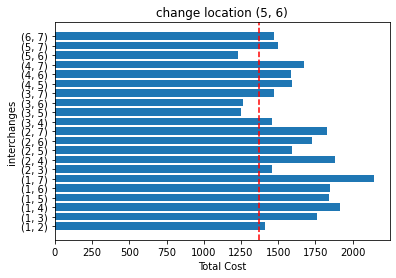

In [93]:
total_cost=CRAFT(flow_matrix,distance_matrix,rearrange_index,rearrange_columns,total_cost,2)


In [94]:
print(f"Total cost after craft iteration 2 : {total_cost}" )

Total cost after craft iteration 2 : 1230


Since the interchange of the machine UMC(LOC6) and VMC(LOC5) gives a better result, the folllowing code makes the necessary interchanges.

In [95]:
rearrange_index=["Receiving","LOC1","LOC2","LOC3","LOC7","LOC5","LOC6","LOC4"]
rearrange_columns=["LOC1","LOC2","LOC3","LOC7","LOC5","LOC6","LOC4","Shipping"]

iter2_distance_matrix=distance_matrix.reindex(index=rearrange_index,
                                            columns=rearrange_columns)
iter2_cost_matrix= pd.DataFrame(flow_matrix.values * iter2_distance_matrix.values, index=flow_matrix.index, columns=name_location(flow_matrix.columns,iter2_distance_matrix.columns))
iter2_cost_matrix

,VTC 1(LOC1),VTC 2(LOC2),CB(LOC3),HMC(LOC7),UMC(LOC5),VMC(LOC6),SHP(LOC4),Shipping
Receiving,78,84,0,0,0,0,0,0
VTC 1,0,0,0,0,0,0,156,108
VTC 2,0,0,0,48,0,54,24,0
CB,0,0,0,0,0,0,0,0
HMC,0,0,0,0,0,0,0,60
UMC,108,0,0,0,0,0,0,0
VMC,0,0,0,126,0,0,0,24
SHP,0,120,0,108,108,24,0,0


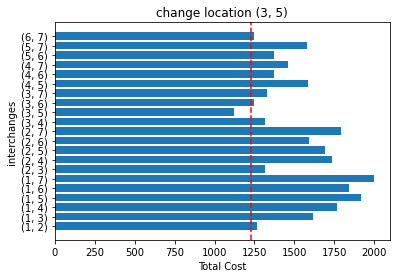

In [96]:
total_cost=CRAFT(flow_matrix,distance_matrix,rearrange_index,rearrange_columns,total_cost,3)

In [97]:
print(f"Total cost after craft iteration 3 : {total_cost}" )

Total cost after craft iteration 3 : 1122


Since the interchange of the machine CB(LOC3) and UMC(LOC5) gives a better result, the folllowing code makes the necessary interchanges.

In [98]:
rearrange_index=["Receiving","LOC1","LOC2","LOC5","LOC7","LOC3","LOC6","LOC4"]
rearrange_columns=["LOC1","LOC2","LOC5","LOC7","LOC3","LOC6","LOC4","Shipping"]

iter3_distance_matrix=distance_matrix.reindex(index=rearrange_index,
                                            columns=rearrange_columns)
iter3_cost_matrix= pd.DataFrame(flow_matrix.values * iter3_distance_matrix.values, index=flow_matrix.index, columns=name_location(flow_matrix.columns,iter3_distance_matrix.columns))
iter3_cost_matrix

,VTC 1(LOC1),VTC 2(LOC2),CB(LOC5),HMC(LOC7),UMC(LOC3),VMC(LOC6),SHP(LOC4),Shipping
Receiving,78,84,0,0,0,0,0,0
VTC 1,0,0,0,0,0,0,156,108
VTC 2,0,0,0,48,0,54,24,0
CB,0,0,0,0,0,0,0,0
HMC,0,0,0,0,0,0,0,60
UMC,72,0,0,0,0,0,0,0
VMC,0,0,0,126,0,0,0,24
SHP,0,120,0,108,36,24,0,0


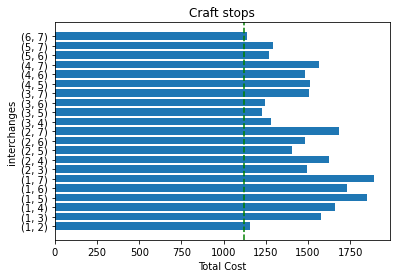

In [99]:
total_cost=CRAFT(flow_matrix,distance_matrix,rearrange_index,rearrange_columns,total_cost,4)

After this step, craft algorithm cannot reduce the total cost hence the algorithm stops.

In [100]:
print(f"Total cost after the last craft  : {total_cost}" )

Total cost after the last craft  : 1122
